# Foreign Direct Investment Analysis

In [3]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Extracting CSV Data From System using Pandas Library
FDI = pd.read_csv('FDI data.csv')
FDI.style.set_caption("Amount in US$ Millions)").format(precision=2)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00
5,PETROLEUM & NATURAL GAS,9.35,211.07,56.78,80.64,102.78,12.09,87.71,1405.04,349.29,265.53,556.43,2029.98,214.80,112.23,1079.02,103.02,180.40
6,BOILERS AND STEAM GENERATING PLANTS,0.00,0.00,0.00,0.04,0.54,0.00,3.31,1.51,0.00,3.96,0.63,31.79,20.05,0.17,1.33,77.91,53.91
7,PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS),0.00,0.00,0.00,0.00,2.66,0.74,25.57,40.53,74.88,39.50,166.44,313.75,184.60,212.78,230.70,159.13,286.88
8,ELECTRICAL EQUIPMENTS,79.76,65.76,34.71,73.20,97.40,39.50,76.85,653.74,417.35,728.27,153.90,566.39,195.87,134.31,574.83,444.88,2230.69
9,COMPUTER SOFTWARE & HARDWARE,228.39,419.39,314.24,368.32,527.90,1359.97,2613.33,1382.25,1543.34,871.86,779.81,796.35,485.96,1126.27,2296.04,5904.36,3651.71


In [5]:
FDI.columns

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

# Column Details

In [ ]:
There are two types of columns:
1.First Column is the 'Sector' Column in which there are 63 different Sectors that have received FDI from 2000-01 to 2016-17.
2.Other columns are Year-wise columns in which we can see how much different sectors received investment from 2000-01 to 2016-17.

In [6]:
Year = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17']
Sectors = ['Sector']

In [7]:
#Extracting Detailed Information
FDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


In [8]:
#Checking the null Values
FDI.isnull().sum()

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64

In [9]:
#Creating Average Exchange Rate list  :-  
Rates = [45.68,47.69,48.39,45.95,44.93,44.27,45.24,40.26,45.99,
         47.44,45.56,47.92,54.40,60.50,61.14,65.46,67.07]

# Converting American '$' to Indian '₹':

In [10]:
#Creating a function to Convert FDI's value from USD to INR  
def multiply_columns(df, col_list, num):
    for col in col_list:
        df[col] = df[col] * Rates[col_list.index(col)]/10
    return df

In [12]:
FDI_InUSD=FDI.copy() 
FDI_02 = multiply_columns(FDI, Year, Rates)

In [13]:
#FDI INFLOWS (Amount in ₹ Crores)
FDI_02.style.set_caption("FDI INFLOWS (Amount in ₹ Crores)").format(precision=2)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,473.46,321.59,857.26,171.23,4045.08,2922.70,3478.09,19057.35,20303.50,9449.62,22794.24,41015.60,43391.02,20776.68,13432.49,19552.94,64784.84
1,MINING,27.54,148.29,235.56,495.76,200.26,145.03,135.49,7202.49,722.51,3924.97,1650.40,3275.71,1713.17,465.95,25583.18,22310.77,2507.85
2,POWER,1865.89,17226.73,1384.12,571.98,875.51,1424.60,3216.32,16025.19,19197.74,28622.32,26398.30,37944.04,15852.70,39021.19,26429.86,37228.18,50066.12
3,NON-CONVENTIONAL ENERGY,0.00,0.00,39.81,87.41,25.64,26.46,49.94,953.39,2662.46,14010.15,4450.33,10383.30,32745.91,15162.59,23024.82,33273.54,35247.99
4,COAL PRODUCTION,0.00,0.00,0.00,0.84,0.00,179.13,26.61,228.22,4.65,0.00,0.00,0.00,0.00,108.34,0.00,0.00,0.00
5,PETROLEUM & NATURAL GAS,195.10,4800.44,1329.56,1702.63,2074.82,236.94,1795.12,22773.84,7387.76,5975.89,11549.89,46614.97,6356.71,4107.90,40334.84,4414.42,8115.09
6,BOILERS AND STEAM GENERATING PLANTS,0.00,0.00,0.00,0.84,10.90,0.00,67.74,24.48,0.00,89.12,13.08,730.00,593.35,6.22,49.72,3338.45,2425.08
7,PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS),0.00,0.00,0.00,0.00,53.70,14.50,523.33,656.94,1583.77,888.97,3454.82,7204.72,5462.98,7788.28,8623.80,6818.74,12904.97
8,ELECTRICAL EQUIPMENTS,1664.32,1495.60,812.77,1545.55,1966.22,774.13,1572.86,10596.26,8827.29,16390.11,3194.52,13006.16,5796.50,4916.08,21487.72,19063.16,100345.02
9,COMPUTER SOFTWARE & HARDWARE,4765.73,9538.34,7358.22,7776.72,10656.74,26653.14,53485.92,22404.44,32642.88,19621.68,16186.62,18286.80,14381.31,41224.30,85828.26,253002.51,164267.97


# Unpivoting DataFrames from wide to long format:

In [14]:
# Unpivoting melt Dataframe
melt = pd.melt(FDI_InUSD, id_vars = Sectors, value_vars = Year, var_name='Year',
    value_name='FDI(US$ Million)',ignore_index=True)
melt

,Sector,Year,FDI(US$ Million)
0,METALLURGICAL INDUSTRIES,2000-01,103.64792
1,MINING,2000-01,6.02976
2,POWER,2000-01,408.47056
3,NON-CONVENTIONAL ENERGY,2000-01,0.00000
4,COAL PRODUCTION,2000-01,0.00000
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,356.61119
1067,COIR,2016-17,0.00000
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,12479.91611
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,705.17398


In [15]:
#Unpivoting melt01 Dataframe
melt01 = pd.melt(FDI_02, id_vars = Sectors, value_vars = Year, var_name='Year',
    value_name='FDI(₹ Crores)',ignore_index=True)
melt01=round(melt01,2)
melt01

,Sector,Year,FDI(₹ Crores)
0,METALLURGICAL INDUSTRIES,2000-01,473.46
1,MINING,2000-01,27.54
2,POWER,2000-01,1865.89
3,NON-CONVENTIONAL ENERGY,2000-01,0.00
4,COAL PRODUCTION,2000-01,0.00
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,2391.79
1067,COIR,2016-17,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,83702.80
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,4729.60


In [16]:
# Merging the FDI(US$ Million) column of melt Dataframe into melto1 Dataframe
Merged=melt01.merge(melt,how='left')
Merged

,Sector,Year,FDI(₹ Crores),FDI(US$ Million)
0,METALLURGICAL INDUSTRIES,2000-01,473.46,103.64792
1,MINING,2000-01,27.54,6.02976
2,POWER,2000-01,1865.89,408.47056
3,NON-CONVENTIONAL ENERGY,2000-01,0.00,0.00000
4,COAL PRODUCTION,2000-01,0.00,0.00000
...,...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,2391.79,356.61119
1067,COIR,2016-17,0.00,0.00000
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,83702.80,12479.91611
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,4729.60,705.17398


In [17]:
#Sorting the Sectors and Year columns
Sorted = Merged.sort_values(['Sector','Year'], ignore_index=True)
Sorted

,Sector,Year,FDI(₹ Crores),FDI(US$ Million)
0,AGRICULTURAL MACHINERY,2000-01,75.95,16.62752
1,AGRICULTURAL MACHINERY,2001-02,23.65,4.95976
2,AGRICULTURAL MACHINERY,2002-03,315.65,65.22972
3,AGRICULTURAL MACHINERY,2003-04,1003.76,218.44630
4,AGRICULTURAL MACHINERY,2004-05,0.00,0.00000
...,...,...,...,...
1066,VEGETABLE OILS AND VANASPATI,2012-13,3207.65,589.64160
1067,VEGETABLE OILS AND VANASPATI,2013-14,788.78,130.37750
1068,VEGETABLE OILS AND VANASPATI,2014-15,5545.10,906.95076
1069,VEGETABLE OILS AND VANASPATI,2015-16,1466.33,224.00412


In [18]:
print("\nStats for Sectors\n",'-'*65, sep='')
print(pd.DataFrame(Sorted.groupby('Sector').describe().loc[:,:]).transpose())


Stats for Sectors
-----------------------------------------------------------------
Sector                  AGRICULTURAL MACHINERY  AGRICULTURE SERVICES  \
FDI(₹ Crores)    count               17.000000             17.000000   
                 mean               752.683529           2910.727647   
                 std                952.597710           6518.839663   
                 min                  0.000000             12.460000   
                 25%                 63.610000            256.450000   
                 50%                315.650000            911.240000   
                 75%               1003.760000           3331.190000   
                 max               2823.530000          27506.720000   
FDI(US$ Million) count               17.000000             17.000000   
                 mean               139.572885            568.894086   
                 std                172.900073           1370.805534   
                 min                  0.000000     

In [19]:
#Repalcing some Long values of Sector Column to Short form
Sorted = Sorted[['Sector','FDI(₹ Crores)', 'FDI(US$ Million)'
                 ,]].replace(["CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects"
                              ,"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)"
                              ,'TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)']
                             ,["CONSTRUCTION DEVELOPMENT","SERVICES SECTOR",'TEA AND COFFEE'])

# Sector-wise Total FDI 2000-17:

In [20]:
#Grouping by Sector column to find Total FDI Inflow per Sector from FY2000-01 to FY2016-17  
Sectorwise_fdi = Sorted.groupby('Sector').sum()
Sectorwise_fdi.sort_values(by='FDI(US$ Million)',ascending=False)

,FDI(₹ Crores),FDI(US$ Million)
Sector,,
SERVICES SECTOR,1737449.04,316347.58398
COMPUTER SOFTWARE & HARDWARE,788081.58,137276.83155
TELECOMMUNICATIONS,738106.79,130966.04891
CONSTRUCTION DEVELOPMENT,553376.36,115185.96101
AUTOMOBILE INDUSTRY,526860.52,92622.65996
...,...,...
PHOTOGRAPHIC RAW FILM AND PAPER,1157.25,278.36669
COAL PRODUCTION,547.79,122.13364
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",219.16,41.61542


# Visualization

<Axes: title={'center': 'SECTOR_WISE FDI INFLOWS'}, xlabel='Sector', ylabel='FDI(₹ Crores)'>

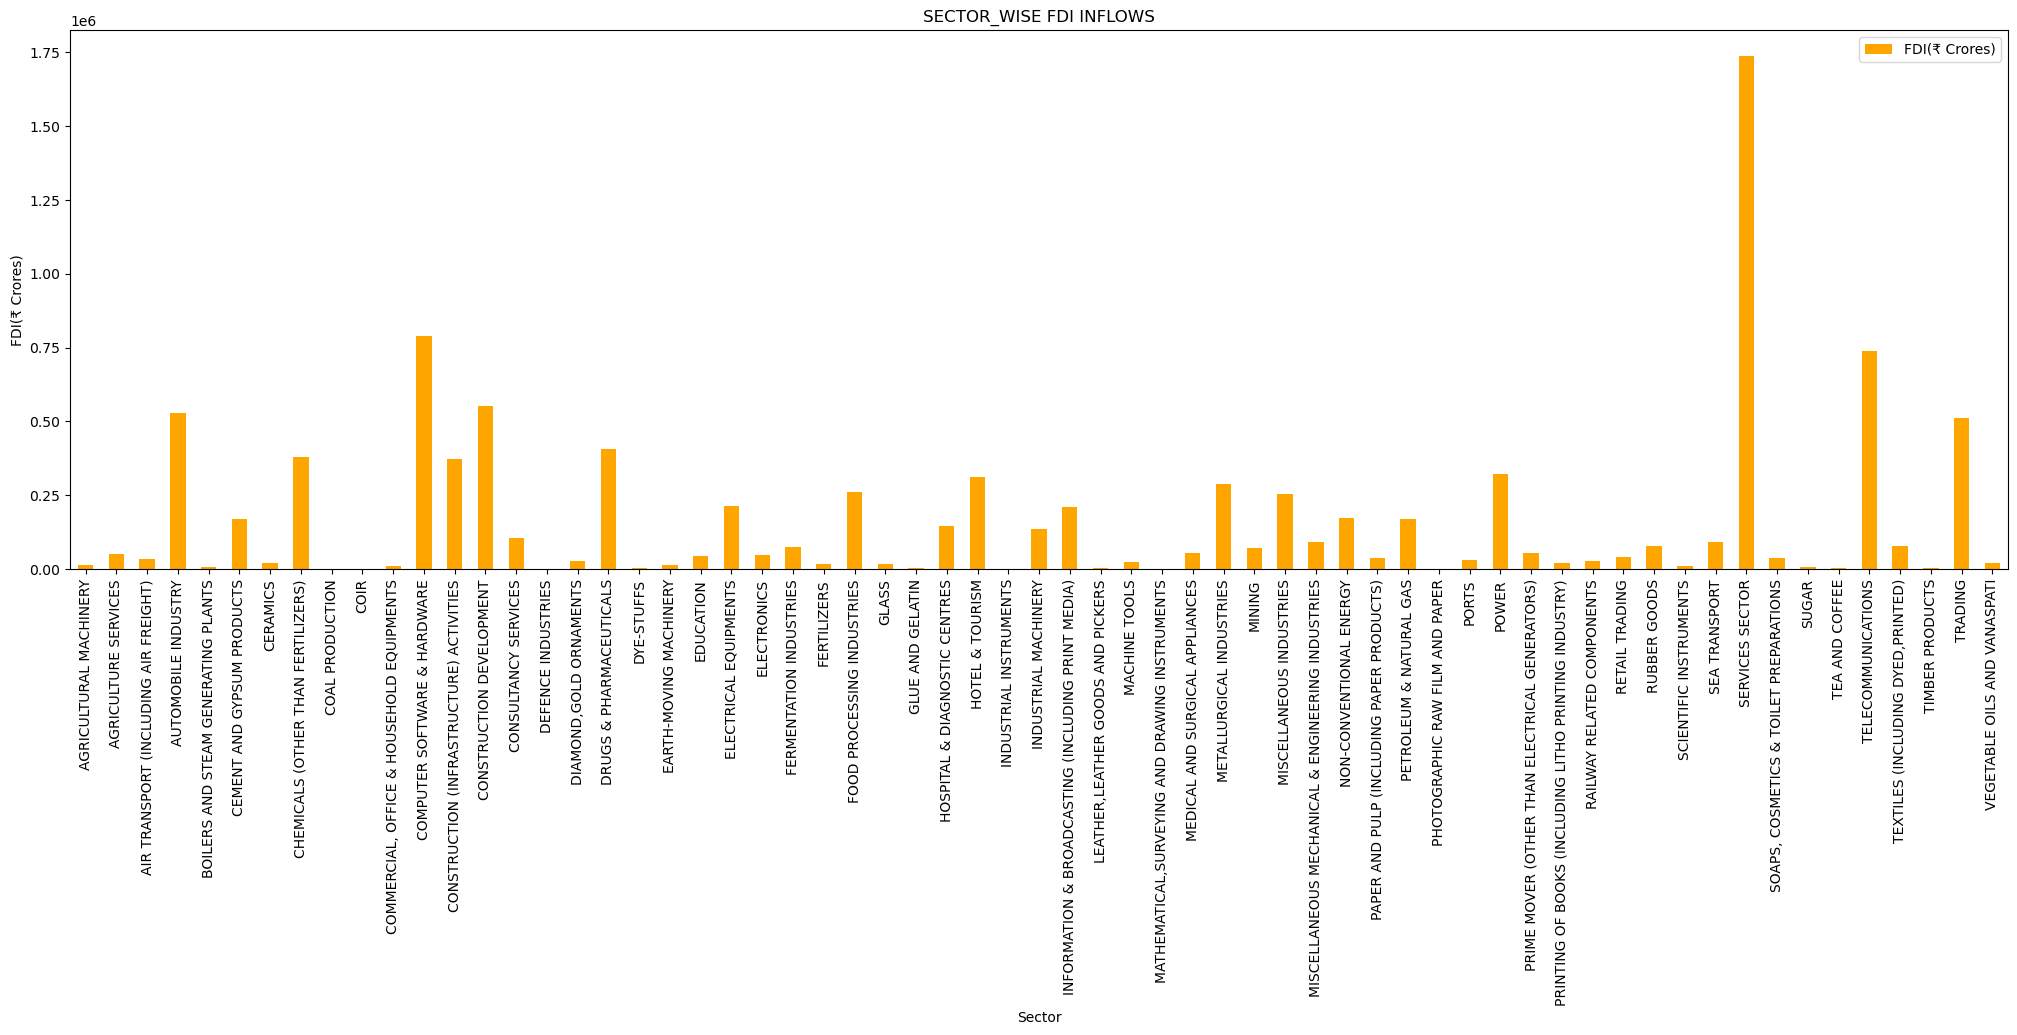

In [21]:
Sectorwise_fdi.plot(kind='bar',y='FDI(₹ Crores)',figsize = (25,7), color="orange", legend= True, title='SECTOR_WISE FDI INFLOWS',ylabel='FDI(₹ Crores)')
                    

<Axes: title={'center': 'SECTOR_WISE FDI INFLOWS'}, xlabel='Sector', ylabel='FDI(US$ Million)'>

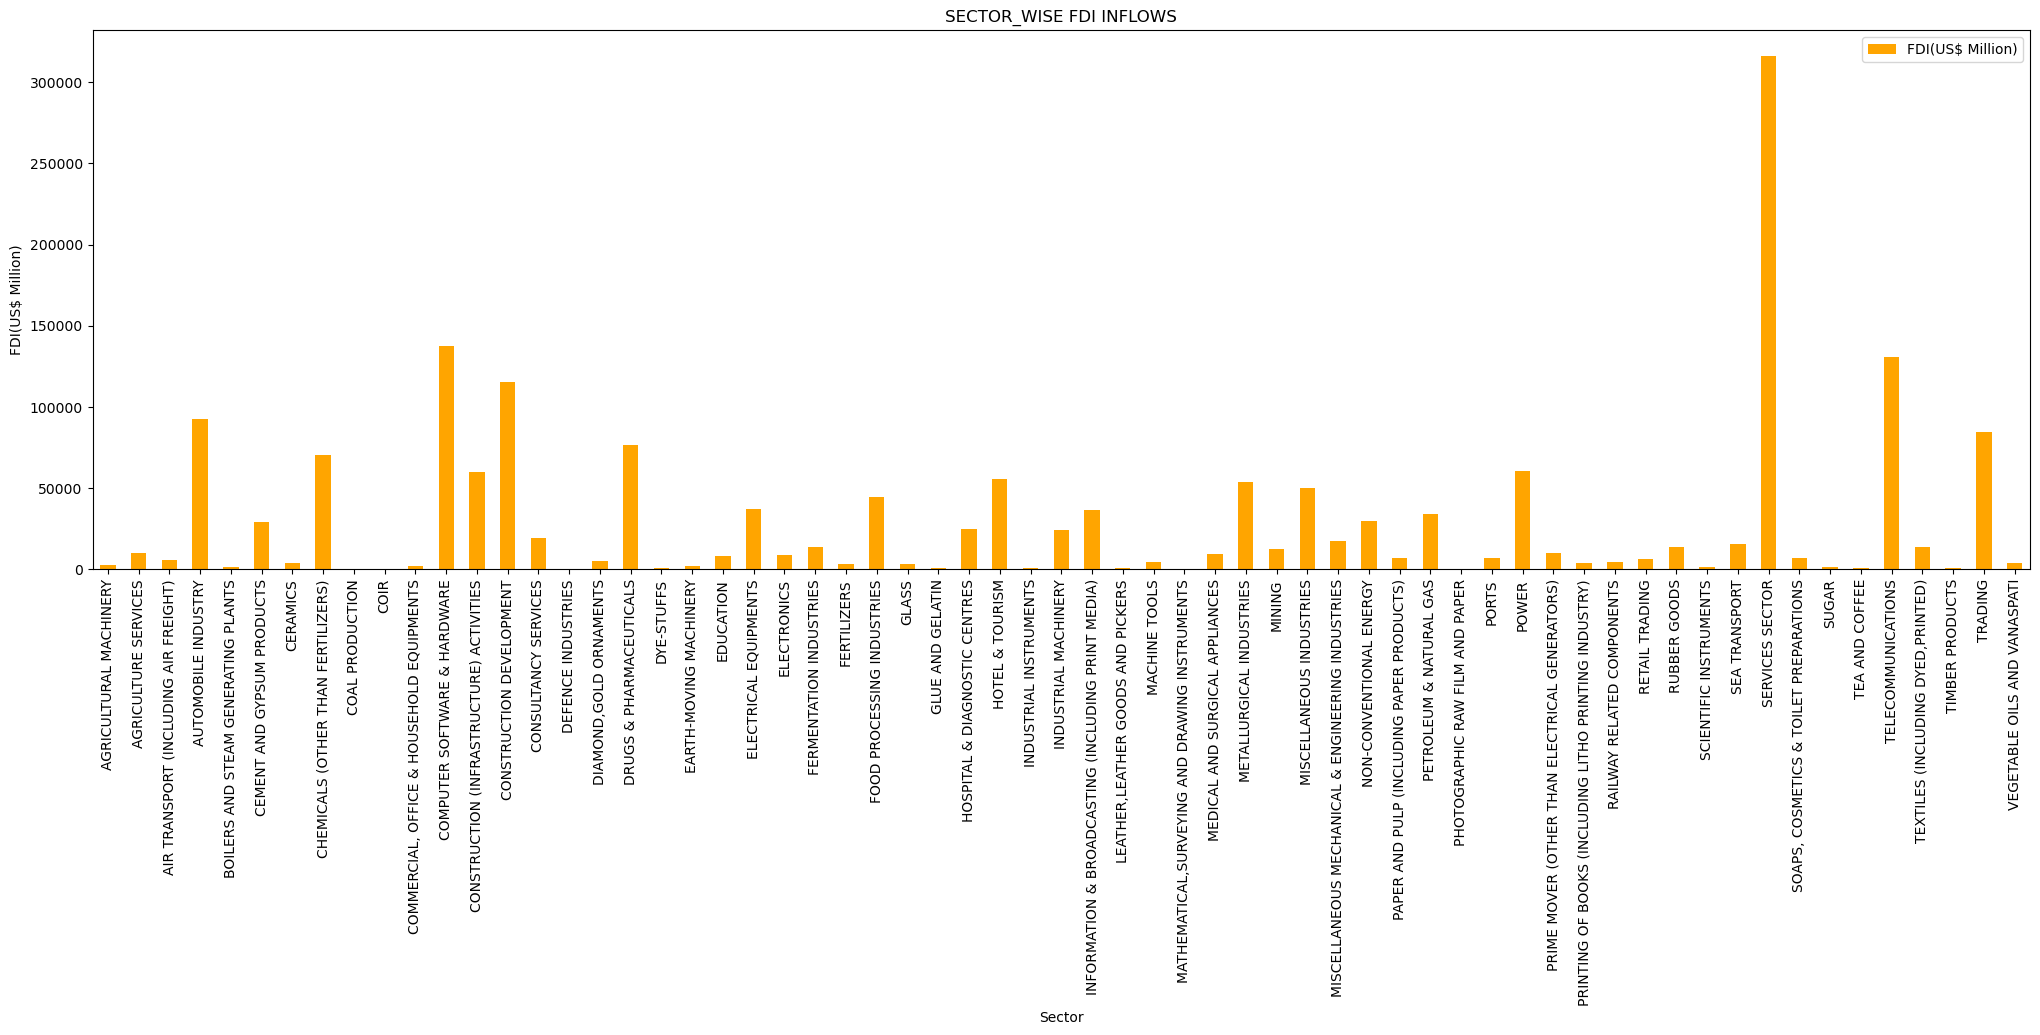

In [22]:
Sectorwise_fdi.plot(kind='bar',y='FDI(US$ Million)',figsize = (25,7),color="orange", legend= True, title='SECTOR_WISE FDI INFLOWS' ,ylabel='FDI(US$ Million)')

# Best & Worst Performing Sectors:

# Top 10 Sectors

In [23]:
#Top 10 and bottom 10 sectors 
Top_10_Sectors = Sectorwise_fdi.nlargest(10,['FDI(₹ Crores)'])

In [24]:
#Calculating percentage-wise FDI share among top 10 sectors and among all sectors 
Total_fdi = round(melt01['FDI(₹ Crores)'].sum(),2)
Sum = Top_10_Sectors['FDI(₹ Crores)'].sum()
Top_10_Sectors['In %age'] = round(Top_10_Sectors['FDI(₹ Crores)']/Sum*100,2) 
Top_10_Sectors['%age to Total Inflows'] = round((Top_10_Sectors['FDI(₹ Crores)']/Total_fdi)*100,2)
Top_10_Sectors

,FDI(₹ Crores),FDI(US$ Million),In %age,%age to Total Inflows
Sector,,,,
SERVICES SECTOR,1737449.04,316347.58398,27.42,17.46
COMPUTER SOFTWARE & HARDWARE,788081.58,137276.83155,12.44,7.92
TELECOMMUNICATIONS,738106.79,130966.04891,11.65,7.42
CONSTRUCTION DEVELOPMENT,553376.36,115185.96101,8.73,5.56
AUTOMOBILE INDUSTRY,526860.52,92622.65996,8.32,5.29
TRADING,511274.98,84487.83457,8.07,5.14
DRUGS & PHARMACEUTICALS,405305.02,76377.63247,6.40,4.07
CHEMICALS (OTHER THAN FERTILIZERS),378624.81,70031.17638,5.98,3.80
CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,373819.27,60099.57546,5.90,3.76


# Visualization

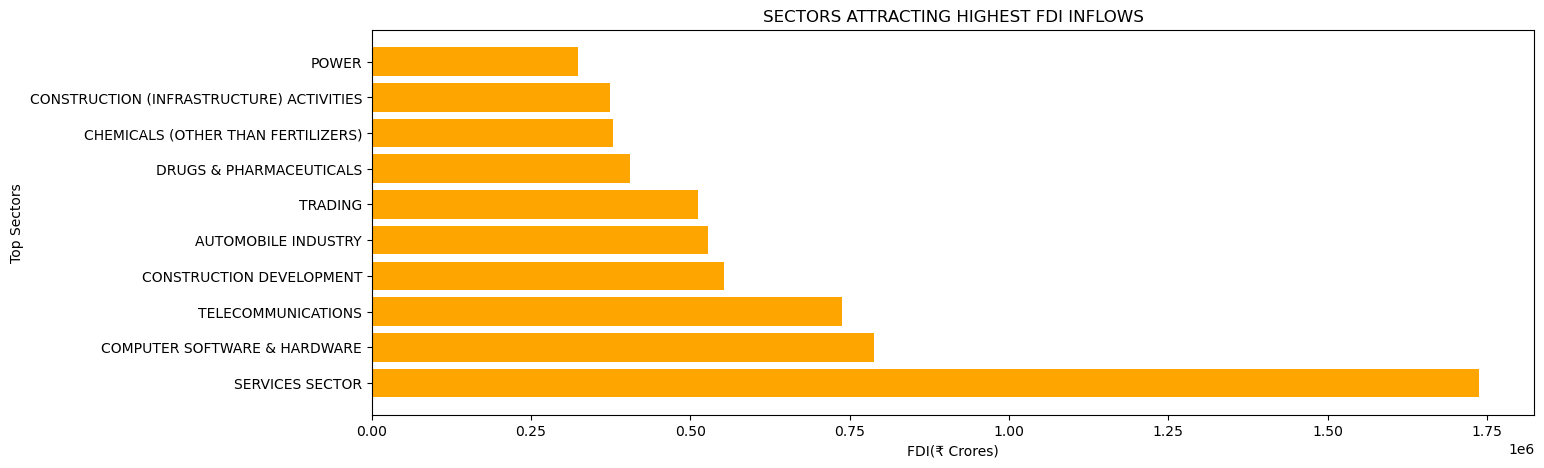

In [25]:
##Creating bar chart to visualise Total FDI inflow in top 10 sectors using Matplotlib

plt.figure(figsize=(15,5))
plt.barh(Top_10_Sectors.index,Top_10_Sectors['FDI(₹ Crores)'],color="orange")
plt.title('SECTORS ATTRACTING HIGHEST FDI INFLOWS')
plt.xlabel('FDI(₹ Crores)')
plt.ylabel('Top Sectors')
plt.show()

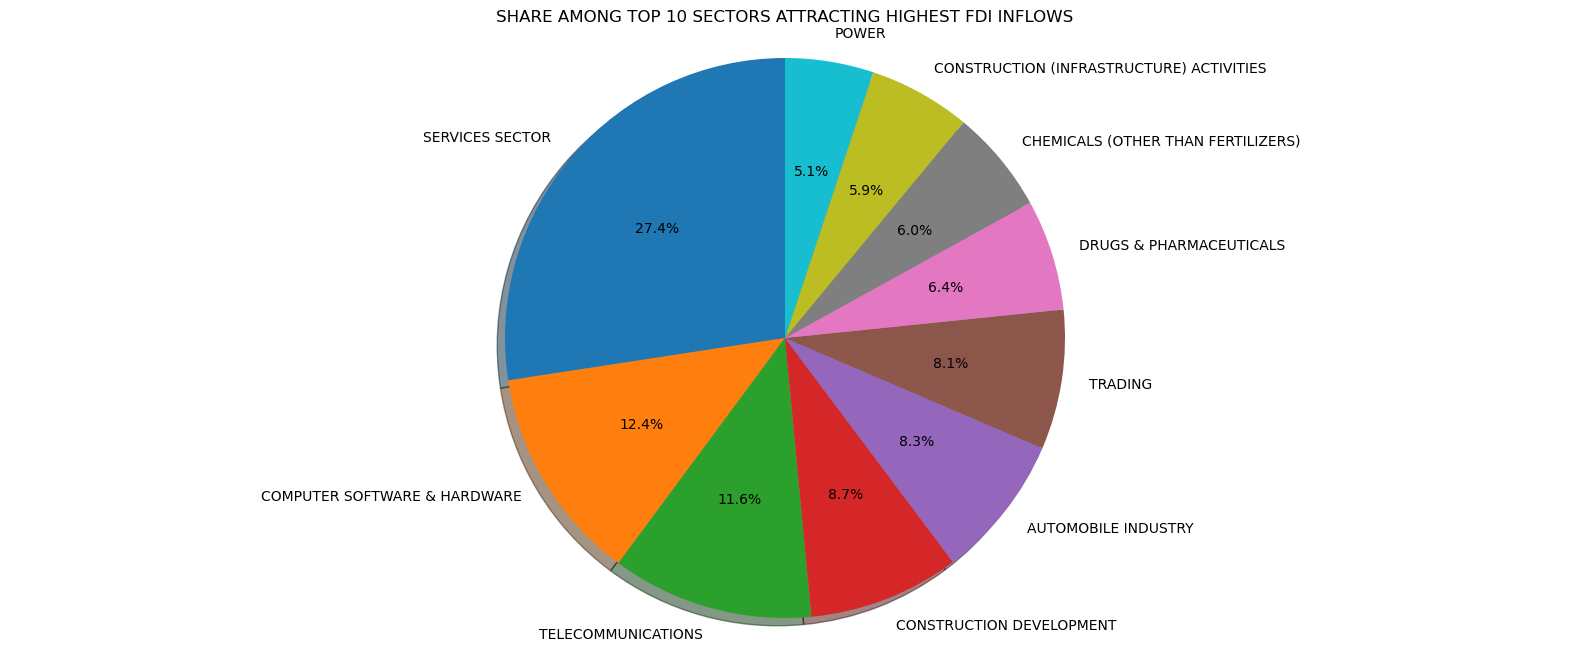

In [26]:
#Creating pie chart to visualise percentage share of FDI among top 10 sectors using Matplotlib

plt.figure(figsize=(20,8))
plt.pie(Top_10_Sectors['FDI(₹ Crores)'],labels=Top_10_Sectors.index,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('SHARE AMONG TOP 10 SECTORS ATTRACTING HIGHEST FDI INFLOWS')
plt.show()

# BOTTOM 5 SECTORS

In [27]:
#Calculating share among Bottom sectors and as a whole 
Bottom_5_Sectors = Sectorwise_fdi.nsmallest(5,['FDI(₹ Crores)'])
Sum = Bottom_5_Sectors['FDI(₹ Crores)'].sum()
Bottom_5_Sectors['In %age'] = round(Bottom_5_Sectors['FDI(₹ Crores)']/Sum*100,2)
Bottom_5_Sectors['%age to Total Inflows'] = round((Bottom_5_Sectors['FDI(₹ Crores)']/Total_fdi)*100,3)
Bottom_5_Sectors

,FDI(₹ Crores),FDI(US$ Million),In %age,%age to Total Inflows
Sector,,,,
COIR,117.42,21.62010,5.40,0.001
DEFENCE INDUSTRIES,134.48,26.09849,6.18,0.001
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",219.16,41.61542,10.07,0.002
COAL PRODUCTION,547.79,122.13364,25.17,0.006
PHOTOGRAPHIC RAW FILM AND PAPER,1157.25,278.36669,53.18,0.012


# Visualisation:

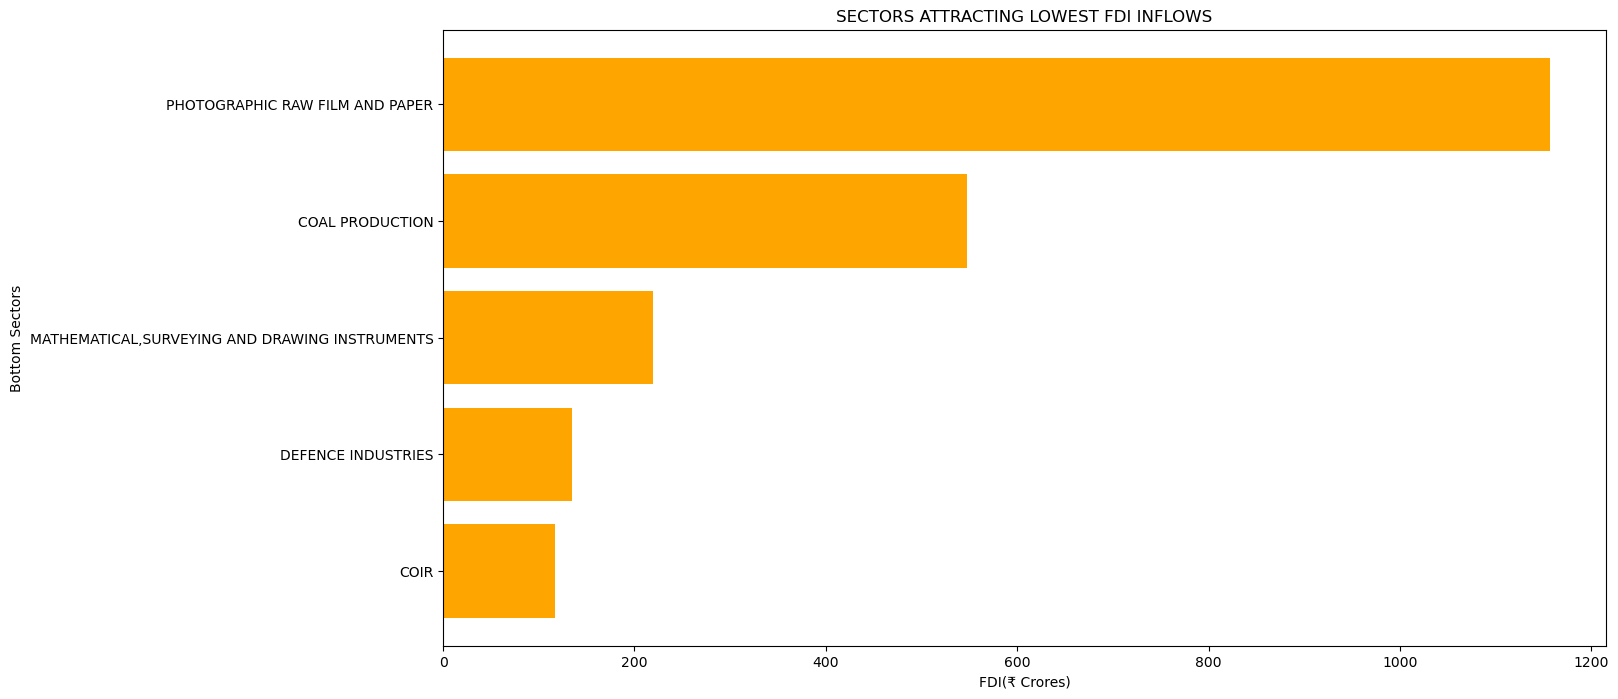

In [28]:
#Creating bar chart to visualise Total FDI inflow in Bottom 5 sectors using Matplotlib

plt.figure(figsize=(15,8))
plt.barh(Bottom_5_Sectors.index,Bottom_5_Sectors['FDI(₹ Crores)'],color="orange")
plt.title('SECTORS ATTRACTING LOWEST FDI INFLOWS')
plt.xlabel('FDI(₹ Crores)')
plt.ylabel('Bottom Sectors')
plt.show()

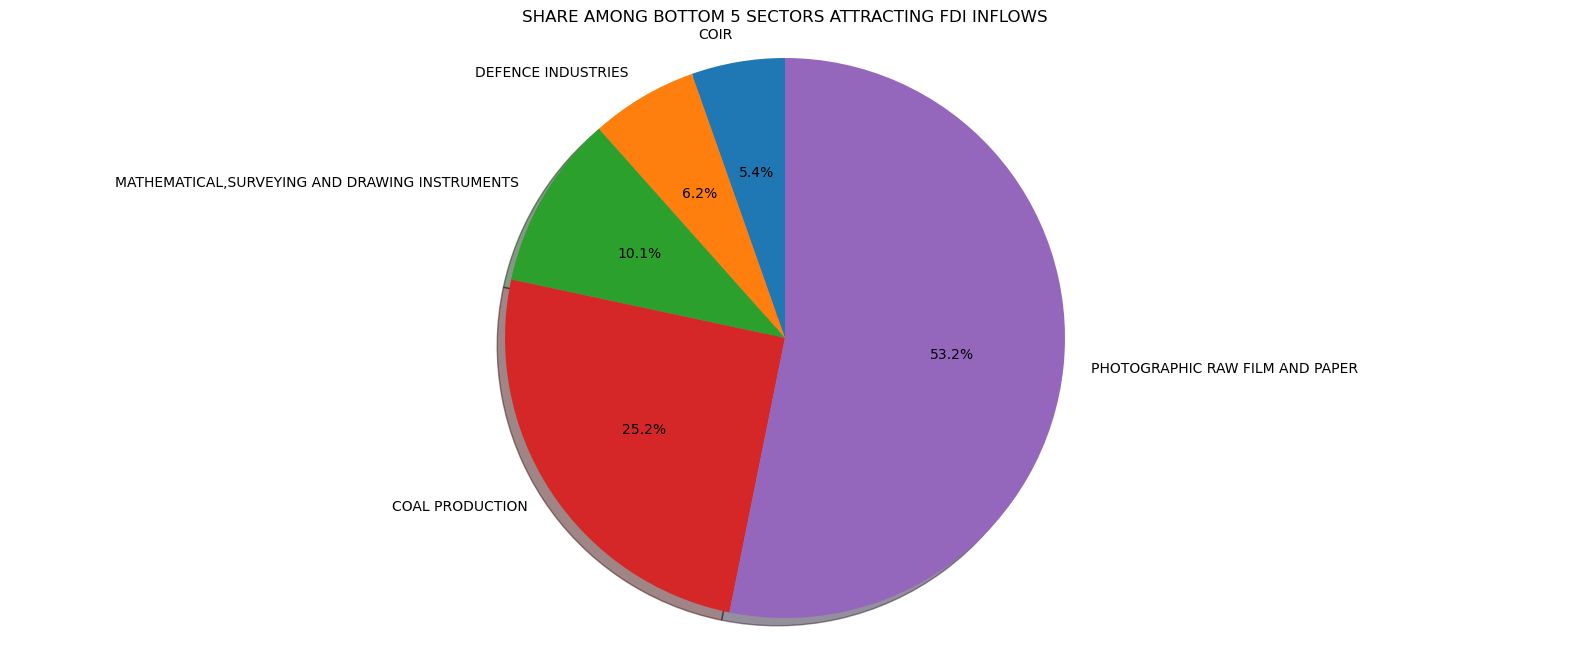

In [29]:
#Creating pie chart to visualise percentage share of FDI among top 10 sectors using Matplotlib

plt.figure(figsize=(20,8))
plt.pie(Bottom_5_Sectors['FDI(₹ Crores)'],labels=Bottom_5_Sectors.index,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('SHARE AMONG BOTTOM 5 SECTORS ATTRACTING FDI INFLOWS')
plt.show()

# Year-wise Details:
Year-wise FDI Inflow

In [30]:
#Creating Dataframe  
melt02 = melt01[['Year', 'FDI(₹ Crores)']]
melt02=round(melt02.groupby('Year').sum(),2)

In [31]:
#Creating new column of % growth over previous year
melt02['% growth over previous year'] = round(melt02.pct_change()*100,2)

In [32]:
print('\n'+"*"*8+"Details on Variation of FDI INFLOW Year-wise"+'*'*8) #Year-wise FDI Inflow
melt02.fillna('-')


********Details on Variation of FDI INFLOW Year-wise********


,FDI(₹ Crores),% growth over previous year
Year,,
2000-01,49635.63,-
2001-02,91603.20,84.55
2002-03,63324.16,-30.87
2003-04,46194.31,-27.05
2004-05,64975.83,40.66
2005-06,108569.82,67.09
2006-07,255663.59,135.48
2007-08,398334.73,55.8
2008-09,664049.70,66.71


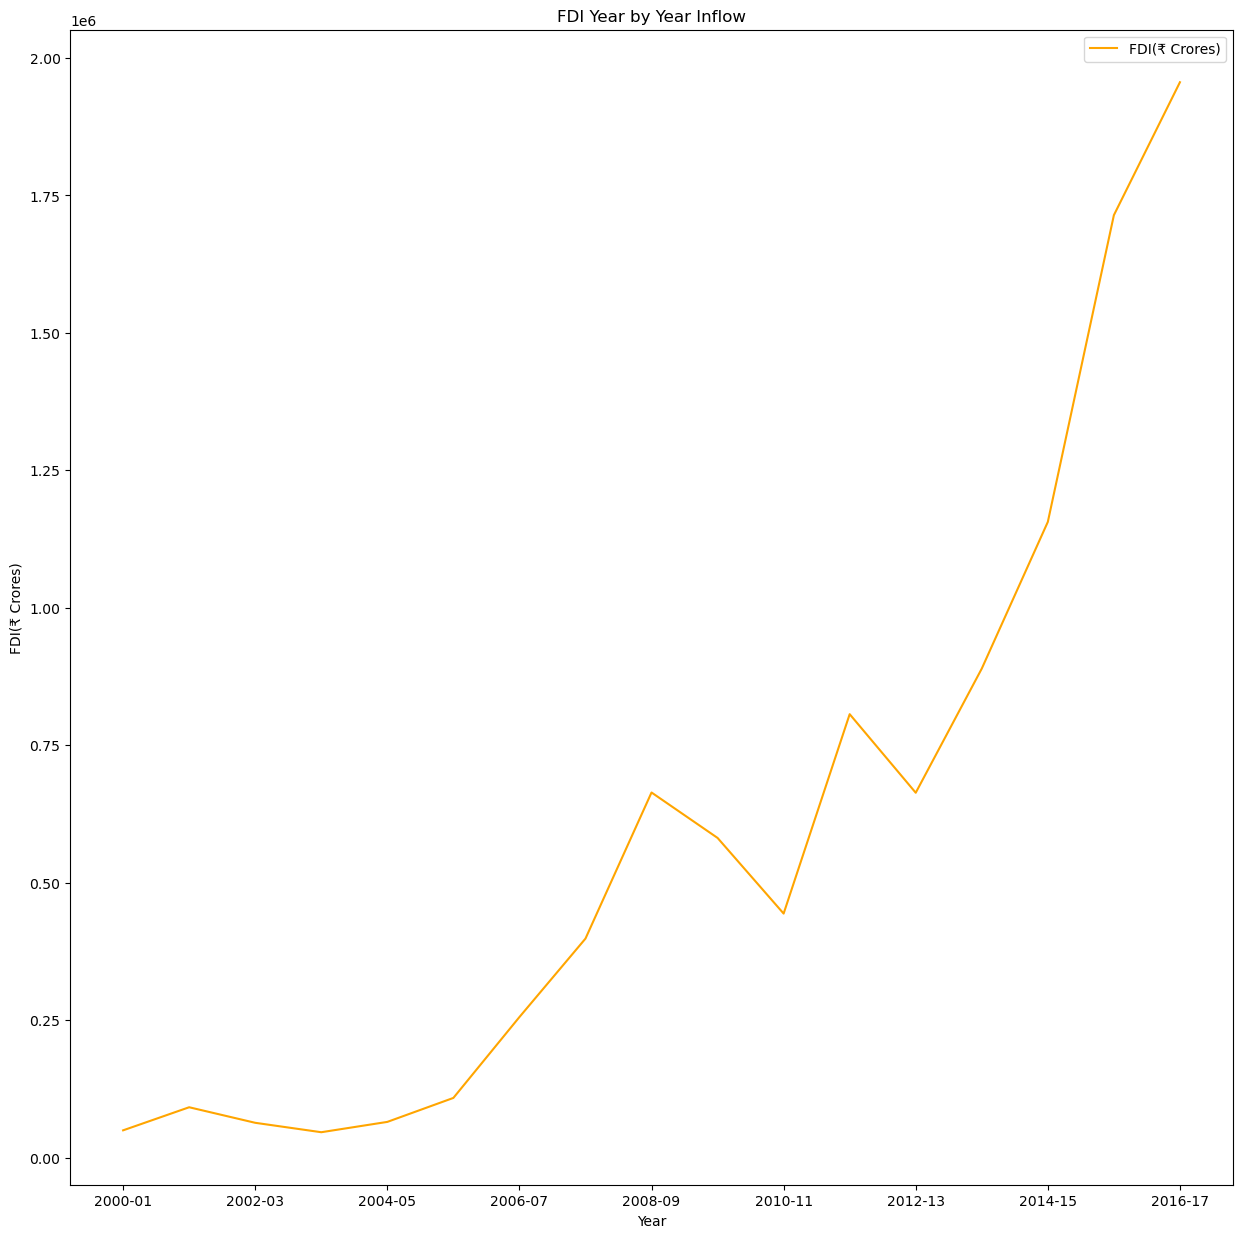

In [33]:
#plotting to show Year by Year FDI Inflow
melt02.plot.line(y='FDI(₹ Crores)',figsize=(15,15), color="orange")
plt.ylabel('FDI(₹ Crores)')
plt.title('FDI Year by Year Inflow')
plt.show()

#Conclusion

In [34]:
Sectorwise_fdi['Year'] = '2000-17'  #Creating a new column with year 2000-17 in Sectorwise_fdi Dataframe

In [35]:
Sectorwise_fdi = Sectorwise_fdi[['Year','FDI(₹ Crores)', 'FDI(US$ Million)']]
Sectorwise_fdi['% of Total Inflows'] = (Sectorwise_fdi['FDI(₹ Crores)']/ Sectorwise_fdi['FDI(₹ Crores)'].sum())*100

C:\Users\admin\AppData\Local\Temp\ipykernel_4488\3324929426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sectorwise_fdi['% of Total Inflows'] = (Sectorwise_fdi['FDI(₹ Crores)']/ Sectorwise_fdi['FDI(₹ Crores)'].sum())*100


In [36]:
Sort_val1 = Sectorwise_fdi.sort_values('FDI(₹ Crores)',ascending=False)
Sort_val= Sort_val1.style.set_caption("SECTOR-WISE FDI INFLOWS").format(precision=3)
Sort_val

,Year,FDI(₹ Crores),FDI(US$ Million),% of Total Inflows
Sector,,,,
SERVICES SECTOR,2000-17,1737449.040,316347.584,17.456
COMPUTER SOFTWARE & HARDWARE,2000-17,788081.580,137276.832,7.918
TELECOMMUNICATIONS,2000-17,738106.790,130966.049,7.416
CONSTRUCTION DEVELOPMENT,2000-17,553376.360,115185.961,5.560
AUTOMOBILE INDUSTRY,2000-17,526860.520,92622.660,5.293
TRADING,2000-17,511274.980,84487.835,5.137
DRUGS & PHARMACEUTICALS,2000-17,405305.020,76377.632,4.072
CHEMICALS (OTHER THAN FERTILIZERS),2000-17,378624.810,70031.176,3.804
CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2000-17,373819.270,60099.575,3.756


# CONCLUSION

#The Sectoral composition of FDI over the period of April 2000 to June 2017, we can find that the largest recipient of such investment is
service sector (Financial and non-financial services). The share of this sector in FDI flows is 17 % of the inflow total foreign direct investment.

The foreign investors are interested in mainly financial services due its profit generating advantage.This sector gives scope for the foreign investor
to takes backthe profits to the home country.
As service sector the services are consumed in the host country and there by generating outflow of funds from the host country.

#The second recipient is Computer software and hardware which shares 7% of total FDI.
Telecommunication,, Construction Development , Automobile industry,Trade, Drugs and pharmaceuticals, 
Chemical ( Other than Fertilizers),Power, Construction,Hotel and tourism contribute around 7%,6%, 5%, 4.7%, 4%, 4%, 3%, 3% .

#Their is very low interset towards sectors like Coir, Defence Industries, Mathematical,surveying and drawing Instruments,
Coal Production and there are around 28 to 30 sectors where share is less than or equal to 1%.